# Chapter 1. Introduction
## 1. 왜 머신러닝인가?

```
초창기 지능형 애플리케이션 -> Rule-based expert system
- 'if', 'else' 명령을 사용하는 시스템
-> 스팸 필터 : 스팸으로 의심되는 단어들로 블랙리스트를 만들어 필터링

- 모델링할 처리 과정을 사람이 잘 알고 있다면 적합한 방법임
-> 얼굴 인식 : 컴퓨터가 인식하는 픽셀 방식이 사람이 얼굴을 인식하는 방식과 매우 다름
->             디지털 이미지에서 얼굴을 구성하는 것이 무엇인지를 규칙으로 표현하기가 불가능

- 작업이 조금만 변경 되어도 전체 시스템을 다시 개발해야 할 수 있음
```

## 2. 머신 러닝의 종류
### 지도 학습 (Supervised Learning)
```
이미 알려진 사례(데이터)를 바탕으로 일반화된 모델을 만드는 것

사용자 -> 데이터, label -> 머신 러닝 시스템
머신 러닝 시스템 -> 주어진 data에서 label을 찾는 방법 -> 사용자

-> 스팸 필터 : 사용자 -> 이메일, 이메일의 스팸 여부 -> 머신 러닝 알고리즘

데이터를 만드는 것이 힘들지만(모드 데이터에 label을 다는 일) 분석 하기에도 좋고 성능을 측정하기 쉽다.


지도 학습의 예)
- 편지 봉투에 손으로 쓴 우편번호 숫자 판별 
-> 데이터 - 손글씨를 스캔한 이미지, label - 숫자

- 의료 영상 이미지에 기반한 종양 판단
-> 데이터 - 의료 영상 이미지, label - 종양이 양성인지 여부

- 의심되는 신용카드 거래 감지
-> 데이터 - 신용카드 거래 내역, label - 부정 거래인지의 여부

```

### 비지도 학습 (Unsupervised Learning)
```
label이 없는 데이터를 모델링 하는 것 

비지도 학습의 예)
- 블로그 글의 주제 구분
-> 비슷한 블로그 글끼리 클러스터링

- 고객들을 취향이 비슷한 그룹으로 묶기

- 비정상적인 웹사이트 접근 탐지
-> 일상적이지 않은 접근 패턴을 찾기

```

## 3. 문제와 데이터 이해하기
```
데이터를 이해하고 그 데이터가 해결해야 할 문제가 무엇인지 정확하게 파악하는 것이 중요
```

## 4. Scikit-Learn 을 사용하기 위한 필수 라이브러리

```
Scikit-learn은 NumPy 와 SciPy 를 기반으로 만들어짐
데이터를 다루기 위해 Pandas도 사용
그래프로 표현해 보기 위해 matplotlib도 사용

Scikit-learn을 배우기 위해서 이 많은 라이브러리들을 하나 하나 배울 수는 없으니
필요한 것을 필요한 때에 써가면서 배워 볼 예정

install 명령
 pip install numpy scipy matplotlib scikit-learn pandas ipython pillow
```



### 4.1 NumPy
```
다차원 배열, 선형 대수등.. 수학 관련 패키지

NumPy 배열이 Scikit-learn의 기본 데이터 구조 (입, 출력 타입이 NumPy 배열이라는 뜻)
```

In [3]:
import numpy as np

x = np.array([[1,2,3], [4, 5, 6]])
print ("x: \n {}".format(x))
print (type(x))

x: 
 [[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>


### 4.2 SciPy
```
고성능 선형 대수, 함수 최적화, 신호 처리, 특수한 수학 함수 등 과학 계산용 함수를 모아 놓은 패키지

scipy.spare가 Scikit-learn의 sparse-matrix(희소 행렬, 0을 많이 포함한 배열) 

np.eye 
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.eye.html
sparse.csr_matrix
https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
```

In [4]:
from scipy import sparse

#대각선 원소는 1이고 나머지는 0인 2차원 NumPy 배열
eye = np.eye(4)
print("NumPy 배열: \n{}".format(eye))

NumPy 배열: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [5]:
# NumPy 배열을 SciPy의 희소 행렬로 변환
# 0이 아닌 원소만 저장
# CSR: Compressed Row Storage
sparse_matrix = sparse.csr_matrix(eye)
print("SciPy의 CSR 행렬:\n{}".format(sparse_matrix))

SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


```
보통 sparse matrix를 0을 모두 채운 2차원 배열로부터 만들지 않으므로 (메모리 문제)
sparse matrix를 바로 만들 수 있어야 함

np.ones 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
np.arange 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html
sparse.coo_matrix 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
```

In [16]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
# COO: Coordinate 포맷의 약자, 데이터가 놓일 행렬의 위치를 별도의 매개변수로 전달
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print ("COO 표현:\n{}".format(eye_coo))

[ 1.  1.  1.  1.]
<class 'numpy.ndarray'>
[0 1 2 3]
<class 'numpy.ndarray'>
COO 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### 4.3 matplotlib
```
그래프 라이브러리
선 그래프, 히스토그램, 산점도 등등
데이터와 분석 결과를 시각화 해 볼 떄 사용

%matplotlib notebook 이나 %matplotlib inline 명령을 사용하면 브라우저에서 바로 이미지로 볼 수 있음
```

<IPython.core.display.Javascript object>


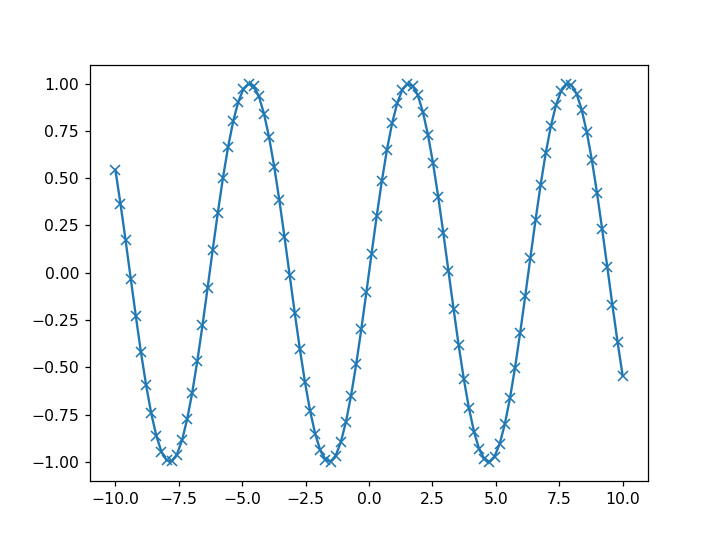

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt

# -10에서 10까지 100개의 간격으로 나뉜 배열을 생성
x = np.linspace(-10, 10, 100)

# 사인(sin) 함수를 사용하여 y 배열을 생성합니다.
y = np.sin(x)

# 플롯(plot) 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프를 그립니다.
plt.plot(x, y, marker = "x")

### 4.4 pandas
```
데이터 처리와 분석을 위한 파이썬 라이브러리
R의 data.frame을 본떠서 설계한 DataFrame이라는 데이터 구조를 기반으로 만들어짐
pandas의 DataFrame은 엑셀의 스프레드시트와 비슷한 테이블 형식이랄까..

테이블 데이터 수정 가능, SQL처럼 테이블에 쿼리나 조인도 가능
SQL, 엑셀 파일, CSV 파일 같은 다양한 파일과 데이터베이스에서 데이터를 읽어 올 수 있음
```

In [23]:
import pandas as pd

# 회원 정보가 들어간 간단한 데이터셋을 생성
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location':["New York", "Paris", "Berlin", "London"],
        'Age': [24, 13, 53, 33]}

data_pandas = pd.DataFrame(data)

# Ipython.display는 주피터 노트북에서 Dataframe을 예쁘게 출력해줍니다.
display(data_pandas)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


```
테이블에 query 하는 방법
```

In [25]:
# Age 값이 30 이상인 모든 데이터를 출력
display (data_pandas[data_pandas.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda
